<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_subtwee4me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given two non-empty binary trees s and t, check whether tree t has exactly the same structure and node values with a subtree of s. A subtree of s is a tree consists of a node in s and all of this node's descendants. The tree s could also be considered as a subtree of itself.

##Solution:
To solve this problem, we need to write a function that checks whether one binary tree is a subtree of another. This involves two main tasks:

1. **Traversal**: We need to traverse the tree `s` and for each node, check whether the subtree rooted at that node is identical to tree `t`.

2. **Identical Trees Check**: For a given node in `s`, we need to check if the subtree rooted at this node is identical to `t`. Two binary trees are considered identical if they have the same structure and node values.

We can use a recursive approach for both traversal and the identical trees check. Here's a high-level outline of the algorithm:

1. Traverse the nodes of tree `s` using a depth-first search (DFS) approach.
2. For each node in `s`, check if the subtree rooted at this node is identical to `t`. This can be done by another recursive function that compares the current node of both trees and then recursively checks the left and right children.
3. If at any point, the subtree rooted at a node in `s` is identical to `t`, return `true`.
4. If no such subtree is found, return `false`.


##Implementation:


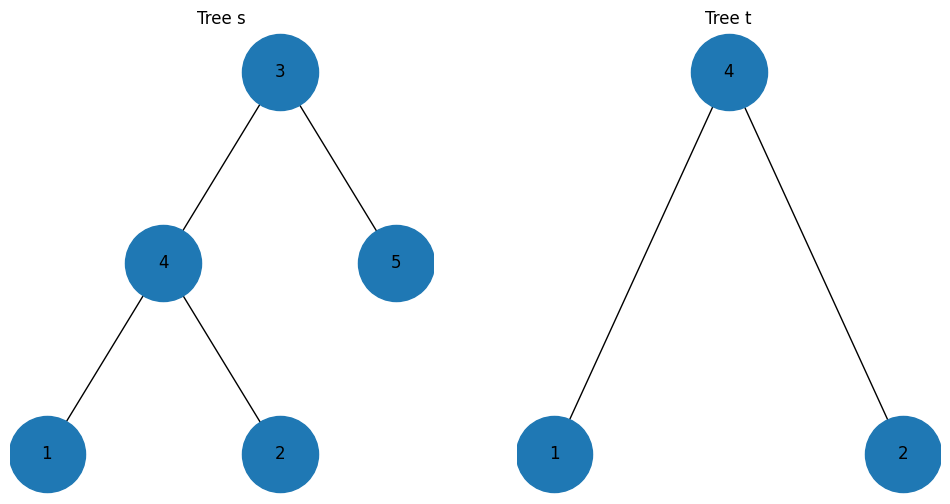

Is t a subtree of s: True


In [7]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, x, id):
        self.val = x
        self.left = None
        self.right = None
        self.id = id  # Unique identifier for each node

def isSubtree(s: TreeNode, t: TreeNode) -> bool:
    if not s:
        return False
    if isSameTree(s, t):
        return True
    return isSubtree(s.left, t) or isSubtree(s.right, t)

def isSameTree(s: TreeNode, t: TreeNode) -> bool:
    if not s and not t:
        return True
    if not s or not t:
        return False
    return s.val == t.val and isSameTree(s.left, t.left) and isSameTree(s.right, t.right)

def draw_binary_tree(root, level=0, pos=None, parent_name=None, G=None):
    if G is None:
        G = nx.DiGraph()
        pos = {root.id: (0, -level)}

    G.add_node(root.id, label=root.val)

    if parent_name is not None:
        G.add_edge(parent_name, root.id)

    children = [root.left, root.right]
    positions = [pos[root.id][0] - 1, pos[root.id][0] + 1]
    for index, child in enumerate(children):
        if child is not None:
            pos[child.id] = (positions[index], -level-1)
            draw_binary_tree(child, level+1, pos, root.id, G)

    return G, pos

# Example usage:

# Create trees
root_s = TreeNode(3, "s1")
root_s.left = TreeNode(4, "s2")
root_s.right = TreeNode(5, "s3")
root_s.left.left = TreeNode(1, "s4")
root_s.left.right = TreeNode(2, "s5")

root_t = TreeNode(4, "t1")
root_t.left = TreeNode(1, "t2")
root_t.right = TreeNode(2, "t3")

# Draw the trees
G_s, pos_s = draw_binary_tree(root_s)
G_t, pos_t = draw_binary_tree(root_t)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
nx.draw(G_s, pos_s, with_labels=True, labels=nx.get_node_attributes(G_s, 'label'), node_size=3000, ax=axs[0], arrows=False)
axs[0].set_title("Tree s")
nx.draw(G_t, pos_t, with_labels=True, labels=nx.get_node_attributes(G_t, 'label'), node_size=3000, ax=axs[1], arrows=False)
axs[1].set_title("Tree t")
plt.show()

# Test if t is a subtree of s
print("Is t a subtree of s:", isSubtree(root_s, root_t))
